In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnasb

In [2]:
 import matplotlib.pyplot as plt # para dibujar

%matplotlib inline
from matplotlib import cm

plt.rcParams['figure.figsize'] = (16, 16)
plt.style.use('ggplot')

warnings.simplefilter('ignore')

In [3]:
# Read the .csv files where we have the information of cabify and the location
df_location = pd.read_csv('Location_cabify.csv')
df = pd.read_csv('Cabify_clean_dataset.csv')

In [4]:
df.head(3).T

0  \
journey_id  23a1406fc6a11d866e3c82f22eed4d4c   
user_id     0e9af5bbf1edfe591b54ecdfd7e91e26   
driver_id   583949a89a9ee17d19e3ca4f137b6b4c   
taxi_id     b12f4f09c783e29fe0d0ea624530db56   
icon                               executive   
start_type                              asap   
start_at                 2010-11-16 16:44:52   
start_lat                           -12.1398   
start_lon                           -77.0236   
end_at                   2010-11-16 17:29:57   
end_lat                             -12.0554   
end_lon                             -77.0413   
end_state                           drop off   
arrived_at               2010-11-16 17:02:14   
price                                   3821   
distance                               11331   
duration                                 234   
cost                                       0   
source                                iPhone   

                                           1                                 2  
journey_id  85b7eabcf5d84e42dc7629b7d27781af  2254715f0f569e3173ec61f16cbb8341  
user_id     56772d544fdfa589a020a1ff894a86f7  56772d544fdfa589a020a1ff894a86f7  
driver_id   d665fb9f75ef5d9cd0fd89479380ba78  baacf396f773709519bbde35a5eab861  
taxi_id     0accdd3aa5a322f4129fa20b53278c69  baacf396f773709519bbde35a585d91b  
icon                               executive                         executive  
start_type                          reserved                          reserved  
start_at                 2010-09-11 23:55:00               2010-08-10 13:00:00  
start_lat                             -12.09                          -12.0224  
start_lon                           -76.9263                          -77.1065  
end_at                   2010-09-12 01:07:02               2010-08-10 14:26:51  
end_lat                             -12.0222                          -12.0898  
end_lon                             -77.1064                          -76.9261  
end_state                           drop off                          drop off  
arrived_at               2010-09-11 23:50:00               2010-08-10 12:53:12  
price                                   8227                              8394  
distance                               30270                             29080  
duration                                 715                              1201  
cost                                    6173                              5875  
source                                iPhone                            iPhone

In [5]:
df_location.head(3).T

0           1        2
latitude      -12.1398      -12.09 -12.0224
longitude     -77.0236    -76.9263 -77.1065
postcode         15063       15051    07031
neighborhood       NaN  Molicentro      NaN
city          Barranco   La Molina   Callao
region            Lima        Lima   Callao
country           Perú        Perú     Perú

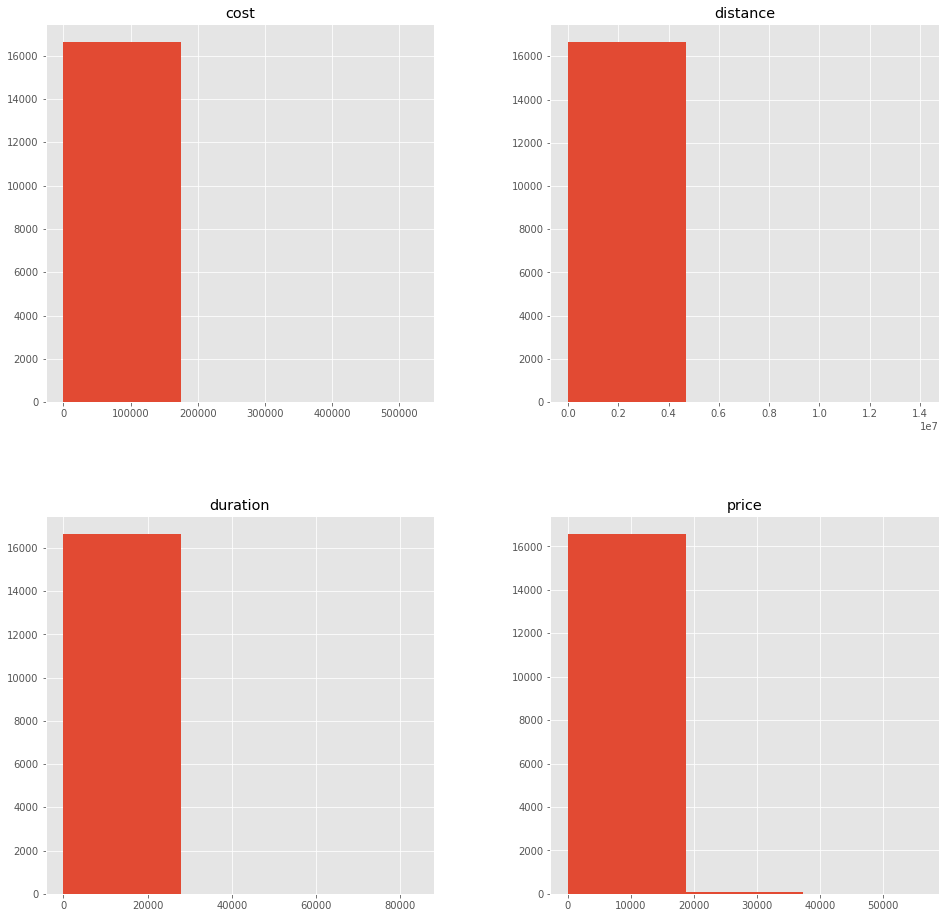

In [29]:
#Let's go to analyze the numeric data of the cabify dataframe:
df[['cost','distance','duration','price']].hist(bins=3)
plt.show()

In [7]:
# In this charts we can see some information like:
    # The cost is always between 0-15.000. And the same for the price.
    # The duration should be between 0-25.000.

In [8]:
# Check again the columns after to appply the first filter to delete the columns with too much null values:
df_location.isnull().sum()

latitude           0
longitude          0
postcode          34
neighborhood    5864
city            1984
region             1
country            0
dtype: int64

In [17]:
# This function clean the postcode data because some of the data contain some letters and we only want the numeric part.
def clean_zipcode(zipcode):
    
    if type(zipcode) != float:
    
        words = ['UNIVERSIDAD NACIONAL FEDERICO VILLARREAL', 'AN ISIDRO' ,'LIMA', 'LIMA ',
                 'LA VICTORIA ', 'BREÑA ', 'CALLAO ', 'L-', 'L']

        for word in words:
            zipcode = zipcode.replace(word,'')
    
    return zipcode

In [18]:
# We apply the function 'clean_zipcode'
df_location['postcode'] = df_location['postcode'].apply(lambda row: clean_zipcode(row))

In [20]:
df_location.head()

latitude  longitude postcode neighborhood        city  region country
0 -12.139835 -77.023560    15063          NaN    Barranco    Lima    Perú
1 -12.089954 -76.926270    15051   Molicentro   La Molina    Lima    Perú
2 -12.022419 -77.106506    07031          NaN      Callao  Callao    Perú
3 -12.089958 -76.926208    15051   Molicentro   La Molina    Lima    Perú
4 -12.113472 -77.043854    15073          NaN  Miraflores    Lima    Perú

In [23]:
# We need to change the name of the columns 'start_lat' and 'start_lon' to make the merge and join both dataset
df.columns = ['journey_id', 'user_id', 'driver_id', 'taxi_id', 'icon', 'start_type',
              'start_at', 'latitude', 'longitude', 'end_at', 'end_lat', 'end_lon',
              'end_state', 'arrived_at', 'price', 'distance', 'duration', 'cost','source']

In [24]:
# We do the merge and join both dataframe
main_df = df.merge(df_location, on=['latitude','longitude'], how='left')

In [26]:
main_df.head(2).T

0  \
journey_id    23a1406fc6a11d866e3c82f22eed4d4c   
user_id       0e9af5bbf1edfe591b54ecdfd7e91e26   
driver_id     583949a89a9ee17d19e3ca4f137b6b4c   
taxi_id       b12f4f09c783e29fe0d0ea624530db56   
icon                                 executive   
start_type                                asap   
start_at                   2010-11-16 16:44:52   
latitude                              -12.1398   
longitude                             -77.0236   
end_at                     2010-11-16 17:29:57   
end_lat                               -12.0554   
end_lon                               -77.0413   
end_state                             drop off   
arrived_at                 2010-11-16 17:02:14   
price                                     3821   
distance                                 11331   
duration                                   234   
cost                                         0   
source                                  iPhone   
postcode                                 15063   
neighborhood                               NaN   
city                                  Barranco   
region                                    Lima   
country                                   Perú   

                                             1  
journey_id    85b7eabcf5d84e42dc7629b7d27781af  
user_id       56772d544fdfa589a020a1ff894a86f7  
driver_id     d665fb9f75ef5d9cd0fd89479380ba78  
taxi_id       0accdd3aa5a322f4129fa20b53278c69  
icon                                 executive  
start_type                            reserved  
start_at                   2010-09-11 23:55:00  
latitude                                -12.09  
longitude                             -76.9263  
end_at                     2010-09-12 01:07:02  
end_lat                               -12.0222  
end_lon                               -77.1064  
end_state                             drop off  
arrived_at                 2010-09-11 23:50:00  
price                                     8227  
distance                                 30270  
duration                                   715  
cost                                      6173  
source                                  iPhone  
postcode                                 15051  
neighborhood                        Molicentro  
city                                 La Molina  
region                                    Lima  
country                                   Perú

In [32]:
main_df.to_csv('Cabify_location_dataset.csv', index = False)